<a href="https://colab.research.google.com/github/RoyMakary/Python-Projects/blob/main/Better_score_kaggle_Nasa_comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from math import log
import seaborn as sns
import pandas as pd
import seaborn as sns # for visuals
import warnings
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na") #get rid of some warnings
warnings.filterwarnings("ignore") #get rid of some warnings

In [ ]:
# Let's load the data ;)
train_df = pd.read_csv('/content/drive/MyDrive/Python data sets/Kaggle_comp_Nasa/Train_Features.csv')
train_output_df = pd.read_csv('/content/drive/MyDrive/Python data sets/Kaggle_comp_Nasa/Train_Output.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Python data sets/Kaggle_comp_Nasa/Test_Features.csv')
train_df['Defect'] = train_output_df['Defect'] # add the defect column in our training data frame

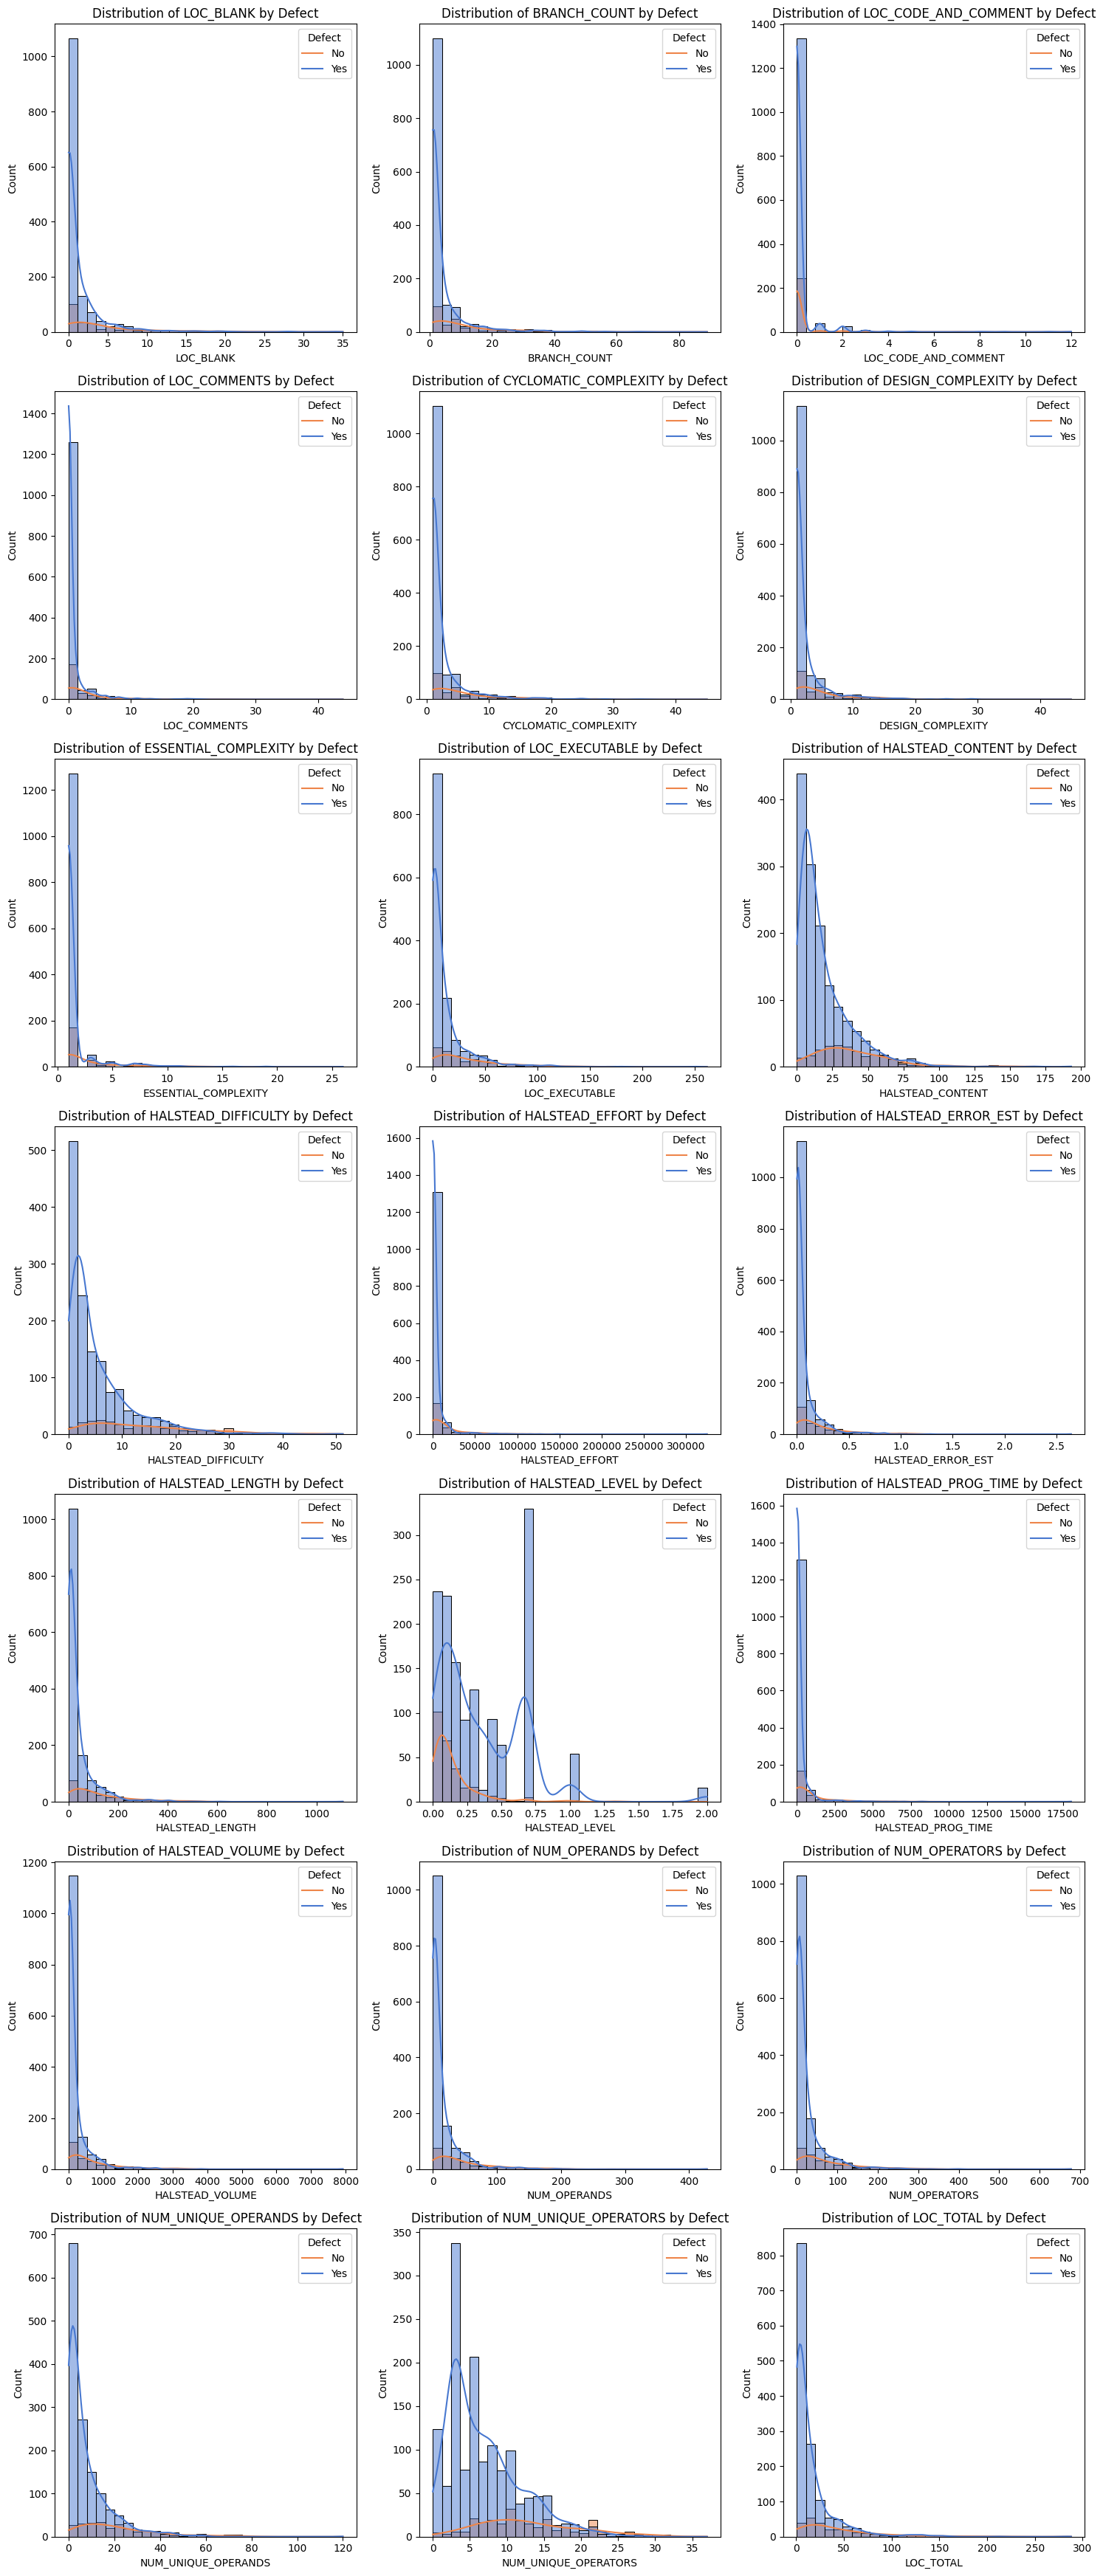

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features
numerical_features = train_df.drop(columns=['Index', 'Defect']).columns

# Determine the number of rows and columns for subplots
num_features = len(numerical_features)
num_cols = 3  # Number of columns for subplots
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Plot histograms for numerical features
for i, feature in enumerate(numerical_features):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(data=train_df, x=feature, hue='Defect', kde=True, bins=30, palette='muted', ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature} by Defect')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Count')
    axes[row, col].legend(title='Defect', labels=['No', 'Yes'])

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the correlation matrix
corr_matrix = train_df.corr()

# Sort the correlation values with respect to the target variable
corr_with_target = corr_matrix['Defect'].sort_values(ascending=False)

# Print the correlation values
print(corr_with_target)

Defect                   1.000000
NUM_UNIQUE_OPERANDS      0.391583
NUM_UNIQUE_OPERATORS     0.388562
HALSTEAD_DIFFICULTY      0.384446
NUM_OPERANDS             0.359358
HALSTEAD_LENGTH          0.352092
HALSTEAD_CONTENT         0.349754
NUM_OPERATORS            0.345892
LOC_TOTAL                0.343577
HALSTEAD_ERROR_EST       0.337759
HALSTEAD_VOLUME          0.336996
LOC_EXECUTABLE           0.334983
LOC_BLANK                0.318173
BRANCH_COUNT             0.296736
CYCLOMATIC_COMPLEXITY    0.294708
DESIGN_COMPLEXITY        0.290782
HALSTEAD_EFFORT          0.267945
HALSTEAD_PROG_TIME       0.267945
LOC_COMMENTS             0.231626
ESSENTIAL_COMPLEXITY     0.213903
Index                    0.029782
LOC_CODE_AND_COMMENT     0.006153
HALSTEAD_LEVEL          -0.236447
Name: Defect, dtype: float64


In [ ]:
# Separate features and target variable
X_train = train_df.drop(columns=['Index', 'Defect'])  # Drop 'Index' and 'Defect' columns
y_train = train_df['Defect']

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Scale the test features
X_test_scaled = scaler.transform(test_df.drop(columns=['Index']))

# Make predictions on the scaled test data
predictions = rf_classifier.predict_proba(X_test_scaled)[:, 1]

# Define threshold
threshold = 0.2

# Convert probabilities to binary predictions
binary_predictions = (predictions >= threshold).astype(int)

# Convert predictions to DataFrame
predictions_df_rf = pd.DataFrame(binary_predictions, columns=['Defect'])
predictions_df_rf.index.name = 'Index'

# Save predictions to CSV
predictions_df_rf.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_Nasa/rf_submission.csv', index=True)

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import ExtraTreesClassifier

# Separate features and target variable
X_train = train_df.drop(columns=['Index', 'Defect'])  # Drop 'Index' and 'Defect' columns
y_train = train_df['Defect']

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply ADASYN oversampling
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train_scaled, y_train)

# Train the Balanced Random Forest Classifier
brf_classifier = BalancedRandomForestClassifier(random_state=42)
brf_classifier.fit(X_resampled, y_resampled)

# Scale the test features
X_test_scaled = scaler.transform(test_df.drop(columns=['Index']))

# Train the Extra Trees Classifier
et_classifier = ExtraTreesClassifier(random_state=42)
et_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
predictions_et = et_classifier.predict_proba(X_test_scaled)[:, 1]

# Define threshold
threshold = 0.2

# Convert probabilities to binary predictions
binary_predictions_et = (predictions_et >= threshold).astype(int)

# Convert predictions to DataFrame
predictions_df_et = pd.DataFrame(binary_predictions_et, columns=['Defect'])
predictions_df_et.index.name = 'Index'

# Save predictions to CSV
predictions_df_et.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_Nasa/et_submission.csv', index=True)

In [ ]:
# Import necessary libraries
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import ExtraTreesClassifier

# Separate features and target variable
X_train = train_df.drop(columns=['Index', 'Defect'])  # Drop 'Index' and 'Defect' columns
y_train = train_df['Defect']

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply ADASYN oversampling
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train_scaled, y_train)

# Scale the test features
X_test_scaled = scaler.transform(test_df.drop(columns=['Index']))

# Train the Extra Trees Classifier
et_classifier = ExtraTreesClassifier(random_state=42)
et_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
predictions_et = et_classifier.predict_proba(X_test_scaled)[:, 1]

# Define threshold
threshold = 0.2

# Convert probabilities to binary predictions
binary_predictions_et = (predictions_et >= threshold).astype(int)

# Convert predictions to DataFrame
predictions_df_et = pd.DataFrame(binary_predictions_et, columns=['Defect'])
predictions_df_et.index.name = 'Index'

# Save predictions to CSV
predictions_df_et.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_Nasa/et_0.2_submission.csv', index=True)


In [11]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import ExtraTreesClassifier

# Separate features and target variable
X_train = train_df.drop(columns=['Index', 'Defect'])  # Drop 'Index' and 'Defect' columns
y_train = train_df['Defect']

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply ADASYN oversampling
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train_scaled, y_train)

# Scale the test features
X_test_scaled = scaler.transform(test_df.drop(columns=['Index']))

# Train the Extra Trees Classifier
et_classifier = ExtraTreesClassifier(random_state=42)
et_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
predictions_et = et_classifier.predict_proba(X_test_scaled)[:, 1]

# Convert predictions to DataFrame
predictions_df_et = pd.DataFrame(predictions_et, columns=['Defect'])
predictions_df_et.index.name = 'Index'

# Save predictions to CSV
predictions_df_et.to_csv('/content/drive/MyDrive/Python data sets/Kaggle_Nasa/et_nonBin_submission.csv', index=True)